# Basic features and overview of possibilities

In [1]:

# Filter warnings (before imports)
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pkg_resources # Must be placed after DeprecationWarning as it is itself deprecated
warnings.filterwarnings('ignore', message='.*pkg_resources.*')
warnings.filterwarnings('ignore', message='.*declare_namespace.*')

# Libraries installed by default
import sys
import os

# Libraries need to be installed if not
import numpy as np
import pandas as pd

# Libraries added from 'conda install' procedure
import matplotlib as mpl        # install automatically by geopandas
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

# # Libraries added from 'pip install' procedure
import imageio
import whitebox
wbt = whitebox.WhiteboxTools()
wbt.verbose = False



In [2]:

from os.path import dirname, abspath
root_dir = '/home/agauvain/Git/HydroModPy'
sys.path.append(root_dir)
print("Root path directory is: {0}".format(root_dir.upper()))



Root path directory is: /HOME/AGAUVAIN/GIT/HYDROMODPY


In [3]:

import src
import importlib
importlib.reload(src)

# Import HydroModPy modules
from src import watershed_root
from src.display import visualization_watershed, visualization_results, export_vtuvtk
from src.tools import toolbox, folder_root

fontprop = toolbox.plot_params(8,15,18,20) # small, medium, interm, large



In [4]:

example_path = os.path.join(root_dir, "examples", "02_basic features and overview of possibilities/")
data_path = os.path.join(example_path, "data/")

# The folder out_path is created in the example_path root directory:
out_path = os.path.join(root_dir,'examples', 'results')
# Or define it manually
# out_path = 'C:/Simulations/HydroModPy/'

print('The results of the example will be saved here :', out_path)



The results of the example will be saved here : /home/agauvain/Git/HydroModPy/examples/results


In [5]:

### Choice of model domain initialization (shapefile, .csv library of coordinates, )
# case = 'FromSHP'    # from a shapefile: clip a provided DEM 
# case = 'FromLIB'  # from a library of coordinates: extract the catchment from a DEM
# case = 'FromXYV'  # from a XY coordinates: the catchment is extracted from outlet coordinates
case = 'FromDEM'  # from a DEM: the model domain is directly the DEM provided
###

if case == 'FromLIB':
    dem_path = os.path.join(data_path, 'regional dem.tif')
    watershed_name = 'Example_02_Library'
    from_lib = os.path.join(data_path,'watershed_library.csv')
    from_dem = None # [path, cell size]
    from_shp = None # [path, buffer size]
    from_xyv = None # [x, y, snap distance, buffer size]
    bottom_path = None # path
    save_object = True

if case == 'FromDEM':
    dem_path = os.path.join(data_path, 'conceptual dem.tif')
    watershed_name = 'Example_02_Topography'
    from_lib = None # os.path.join(root_dir,'watershed_library.csv')
    from_dem = [dem_path, 100] # [path, cell size]
    from_shp = None # [path, buffer size]
    from_xyv = None # [x, y, snap distance, buffer size]
    bottom_path = None # path
    save_object = True

if case == 'FromSHP':
    dem_path = os.path.join(data_path, 'regional dem.tif')
    watershed_name = 'Example_02_Shapefile'
    from_lib = None # os.path.join(root_dir,'watershed_library.csv')
    from_dem = None # [path, cell size]
    from_shp = [data_path + '/' + 'conceptual shp.shp', 10] # [path, buffer size]
    from_xyv = None # [x, y, snap distance, buffer size]
    bottom_path = None # path
    save_object = True

if case == 'FromXYV':
    dem_path = os.path.join(data_path, 'regional dem.tif')
    watershed_name = 'Example_02_Coordinates'
    from_lib = None # os.path.join(root_dir,'watershed_library.csv')
    from_dem = None # [path, cell size]
    from_shp = None # [path, buffer size]
    from_xyv = [127307.551 , 6835727.567 , 200 , 10 , 'EPSG:2154'] # [x, y, snap distance, buffer size, crs proj]
    bottom_path = None # path
    save_object = True



In [6]:

print('##### '+watershed_name.upper()+' #####')

load = True
BV = watershed_root.Watershed(dem_path=dem_path,
                              out_path=out_path,
                              load=load,
                              watershed_name=watershed_name,
                              from_lib=from_lib, # os.path.join(root_dir,'watershed_library.csv')
                              from_dem=from_dem, # [path, cell size]
                              from_shp=from_shp, # [path, buffer size]
                              from_xyv=from_xyv, # [x, y, snap distance, buffer size]
                              bottom_path=bottom_path, # path
                              save_object=save_object)

# Paths generated automatically but necessary for plots
stable_folder = os.path.join(out_path,watershed_name,"results_stable")
simulations_folder = os.path.join(out_path,watershed_name,"results_simulations")



##### EXAMPLE_02_TOPOGRAPHY #####
      __  __          __           __  ____          ________     
     / / / /         / /          /  \/   /         / / __  /     
    / /_/ /_  ______/ /________  /       /___  ____/ / /_/ /_  __ 
   / __  / / / / __  / ___/ __ \/ /\,-/ / __ \/ __  / ____/ / / / 
  / / / / /_/ / /_/ / /  / /_/ / /   / / /_/ / /_/ / /   / /_/ /  
 /_/ /_/\__, /_____/_/   \____/_/   /_/\____/_____/_/____\__, /   
       /____/ Hydrological Modelling in Python /_____________/    
                                                                  
Python object was successfully loaded as requested; imported from output directory


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


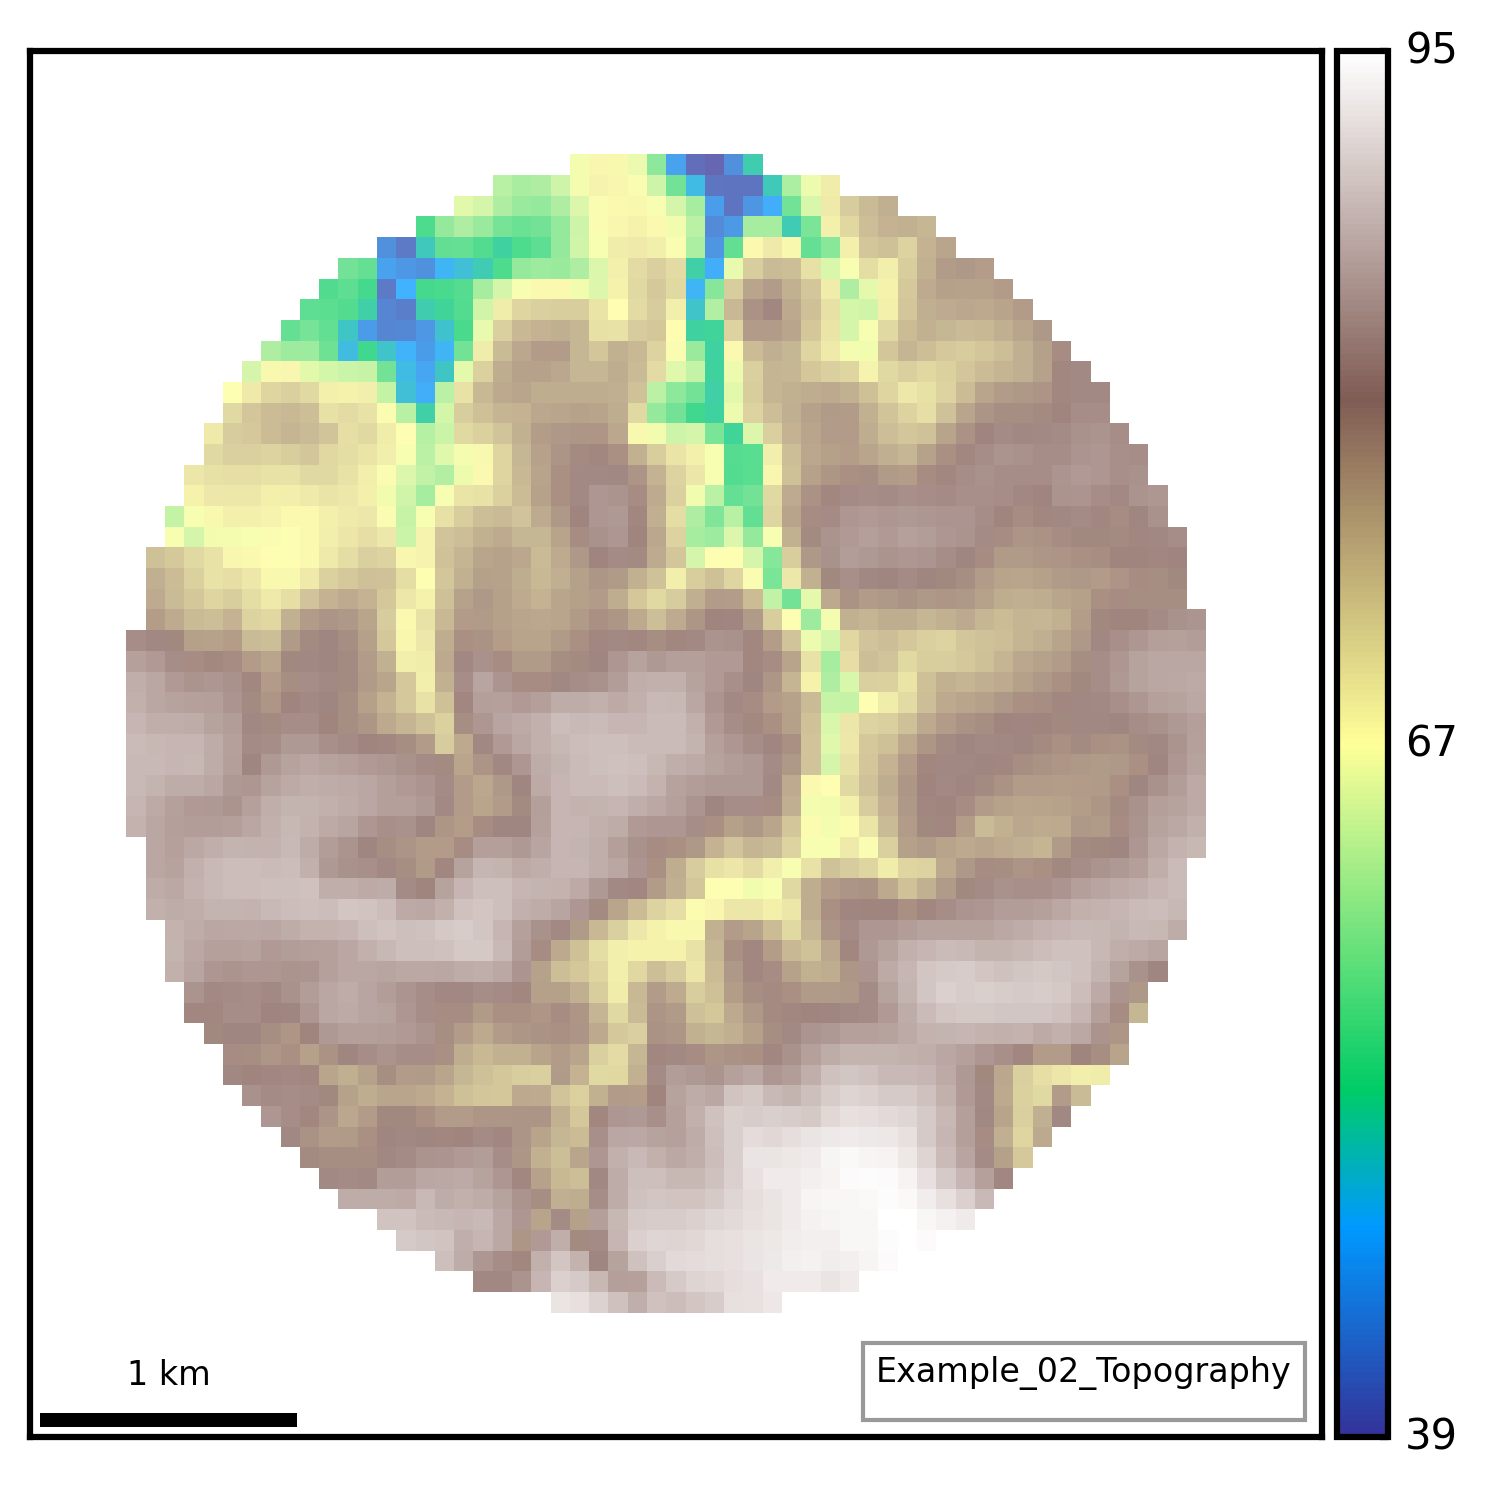

In [7]:

if from_dem == None:
    # Clip specific data at the catchment scale
    BV.add_geology(data_path, types_obs='GEO1M.shp', fields_obs='CODE_LEG')
    BV.add_hydrography(data_path, types_obs=['regional stream network'], fields_obs=['fid'])
    BV.add_hydrometry(data_path, 'france hydrometric stations.shp')

# General plot of the study site
if from_dem == None:
    visualization_watershed.watershed_local(dem_path, BV)
    visualization_watershed.watershed_geology(BV)
visualization_watershed.watershed_dem(BV)



Init climatic module to set model parameter


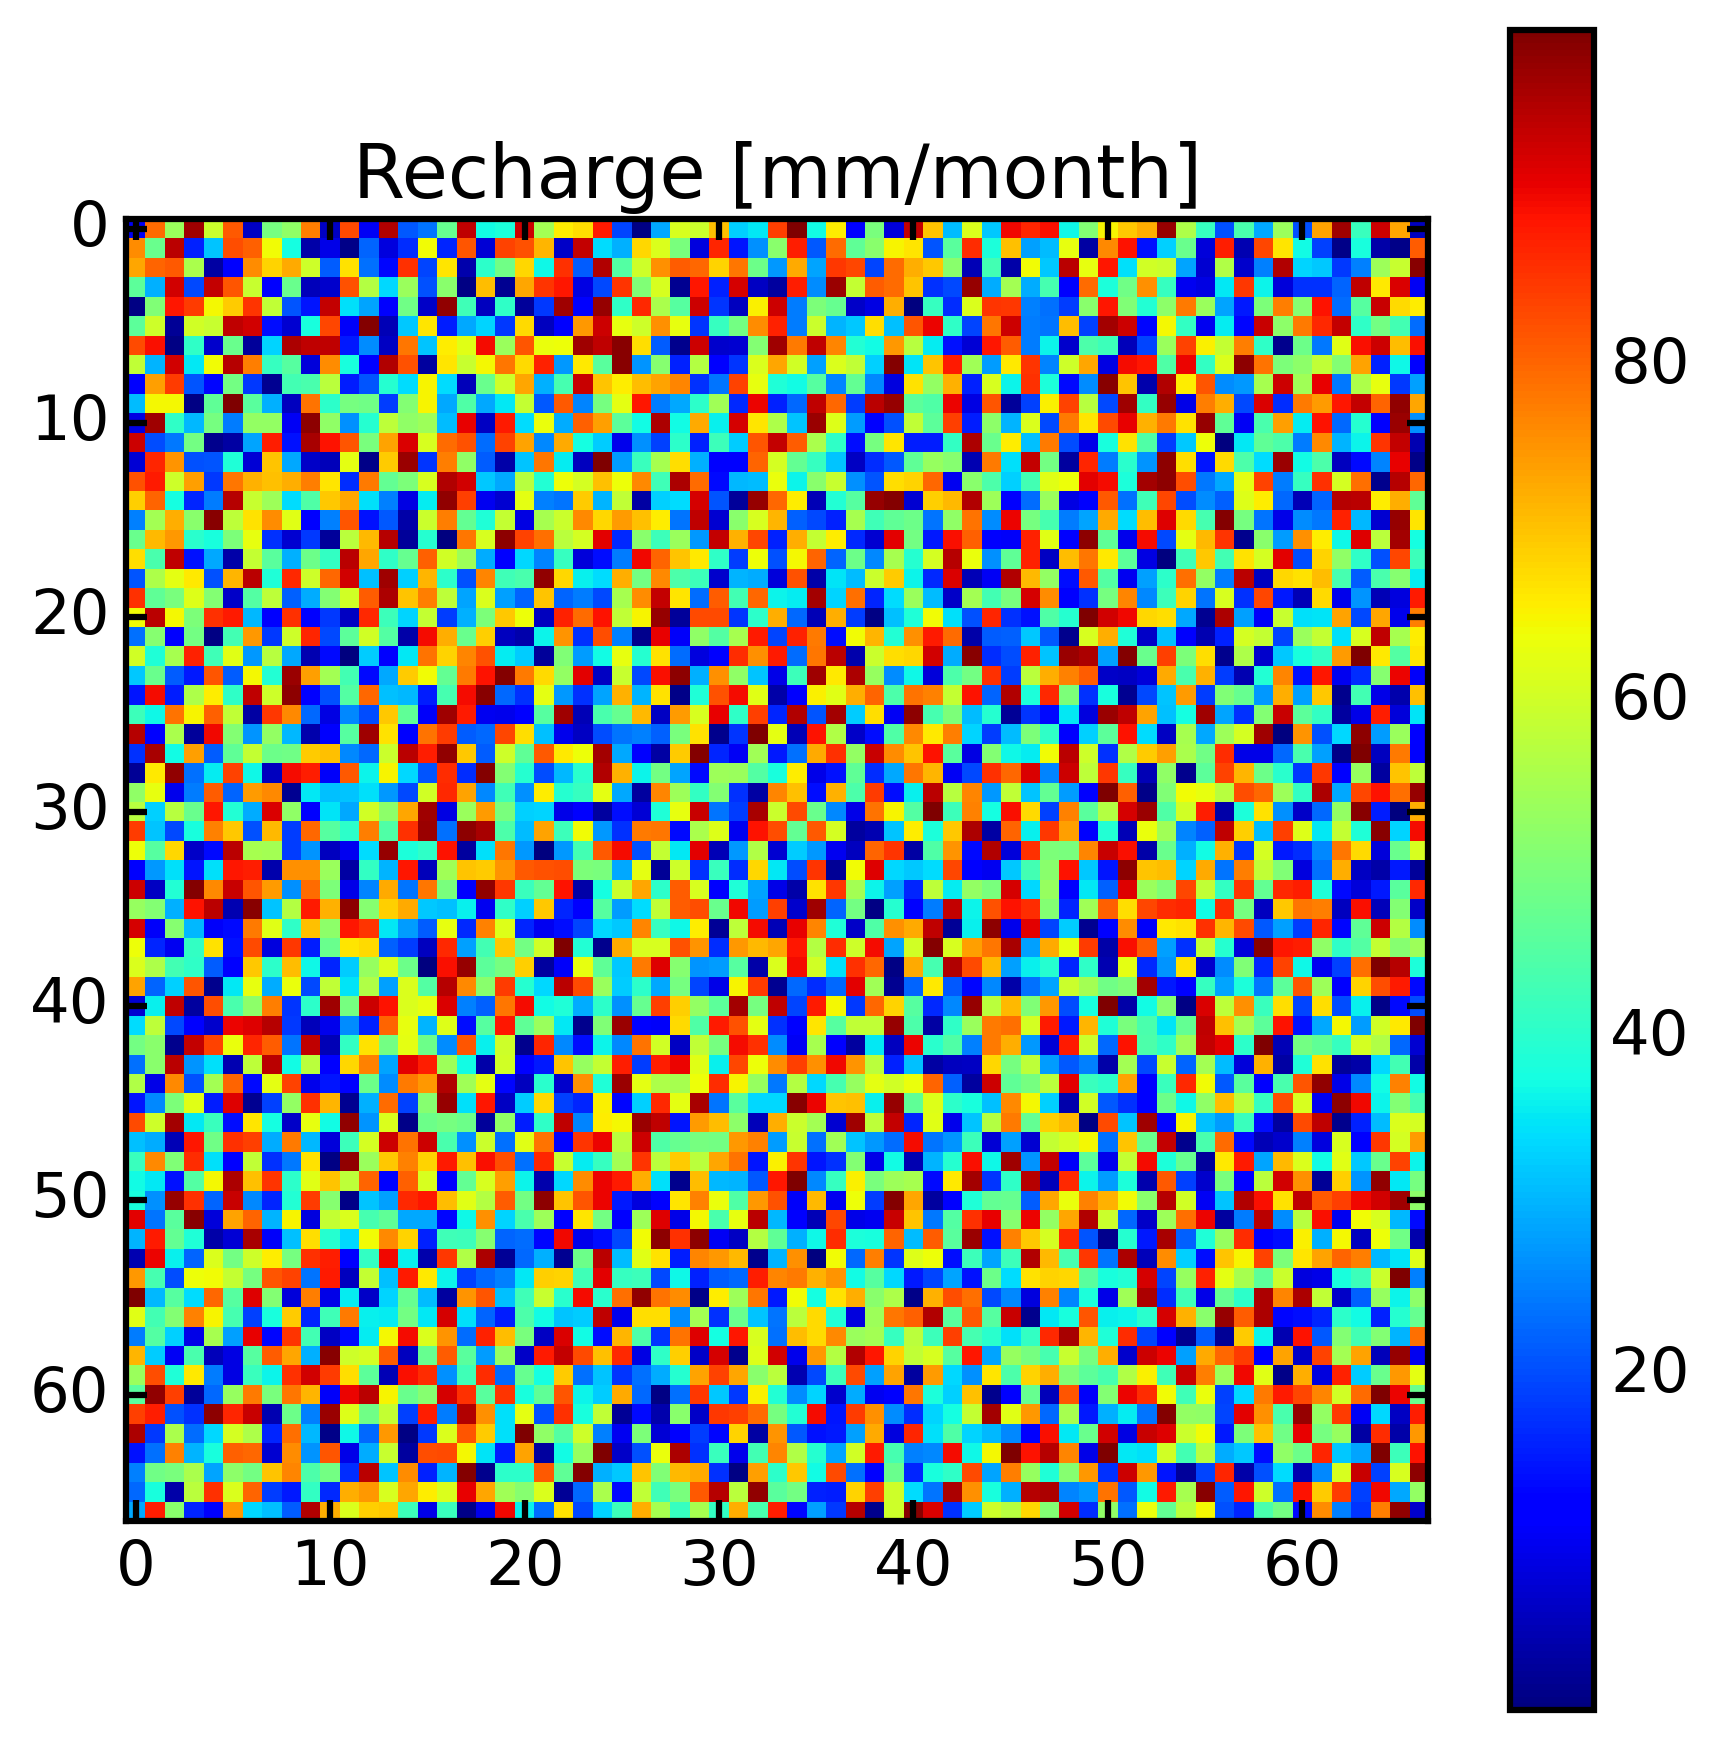

In [8]:

# # Necessary to set model parameters
BV.add_climatic()

### Choice the case of recharge input
# recharge_data = 'manual'
# recharge_data = 'reanalysis'
# recharge_data = 'explore1'
# recharge_data = 'explore2'
# recharge_data = 'synthetic'
# recharge_data = 'raster'
# recharge_data = 'evapotranspiration'
recharge_data = 'dictionary'
###

if recharge_data == 'manual':
    
    time_series = pd.Series([10,20,30,40,50,60,60,50,40,30,20,10]) # mm/month
    BV.climatic.update_recharge(time_series, sim_state='transient')
    fig, ax = plt.subplots(1,1, figsize=(6,3))
    R = BV.climatic.recharge / 1000 / 30
    r = R * 0.1
    ax.plot(R, label='recharge_manual', c='dodgerblue', lw=2)
    ax.plot(r, label='runoff_manual', c='navy', lw=2)
    ax.set_xlabel('Months')
    ax.set_ylabel('[mm/month]')
    ax.legend()

if recharge_data == 'reanalysis':
    BV.climatic.update_recharge_reanalysis(path_file=os.path.join(data_path,'_climate_REANALYSIS.csv'),
                                           clim_mod='REA',
                                           clim_sce='historic',
                                           first_year=1990,
                                           last_year=2019,
                                           time_step='D',
                                           sim_state='transient')
    BV.climatic.update_runoff_reanalysis(path_file=os.path.join(data_path,'_climate_REANALYSIS.csv'),
                                         clim_mod='REA',
                                         clim_sce='historic',
                                         first_year=1990,
                                         last_year=2019,
                                         time_step='D',
                                         sim_state='transient')
    fig, ax = plt.subplots(1,1, figsize=(6,3))
    R = BV.climatic.recharge.resample('Y').sum()*1000
    r = BV.climatic.runoff.resample('Y').sum()*1000
    ax.plot(R, label='echarge_reanalysis', c='dodgerblue', lw=2)
    ax.plot(r, label='runoff_reanalysis', c='navy', lw=2)
    ax.set_xlabel('Date')
    ax.set_ylabel('[mm/year]')
    ax.legend()

if recharge_data == 'explore1':
    BV.climatic.update_recharge_explore1(path_file=os.path.join(data_path,'_climate_EXPLORE1.csv'),
                                         clim_mod='IPS1',
                                         clim_sce='RCP8.5',
                                         first_year=2020,
                                         last_year=2099,
                                         time_step='D',
                                         sim_state='transient')
    BV.climatic.update_runoff_explore1(path_file=os.path.join(data_path,'_climate_EXPLORE1.csv'),
                                         clim_mod='IPS1',
                                         clim_sce='RCP8.5',
                                         first_year=2020,
                                         last_year=2099,
                                         time_step='D',
                                         sim_state='transient')
    fig, ax = plt.subplots(1,1, figsize=(6,3))
    R = BV.climatic.recharge.resample('Y').sum()*1000
    r = BV.climatic.runoff.resample('Y').sum()*1000
    ax.plot(R, label='recharge_explore1', c='dodgerblue', lw=2)
    ax.plot(r, label='runoff_explore1', c='navy', lw=2)
    ax.set_xlabel('Date')
    ax.set_ylabel('[mm/year]')
    ax.legend()

if recharge_data == 'explore2':
    BV.climatic.update_recharge_explore2(path_file=os.path.join(data_path,'_climate_EXPLORE2.csv'),
                                         gcm_mod='CNR',
                                         rcm_mod='ALA',
                                         sce_mod='RCP8.5',
                                         first_year=2020,
                                         last_year=2099,
                                         sim_state='transient')
    BV.climatic.update_runoff_explore2(path_file=os.path.join(data_path,'_climate_EXPLORE2.csv'),
                                         gcm_mod='CNR',
                                         rcm_mod='ALA',
                                         sce_mod='RCP8.5',
                                         first_year=2020,
                                         last_year=2099,
                                         sim_state='transient')
    fig, ax = plt.subplots(1,1, figsize=(6,3))
    R = BV.climatic.recharge.resample('Y').sum()*1000
    r = BV.climatic.runoff.resample('Y').sum()*1000
    ax.plot(R, label='recharge_explore2', c='dodgerblue', lw=2)
    ax.plot(r, label='runoff_explore2', c='navy', lw=2)
    ax.set_xlabel('Date')
    ax.set_ylabel('[mm/year]')
    ax.legend()

if recharge_data == 'synthetic':
    rtot = 500 / 1000
    shape = 24
    years = 5
    start_date = "2000-01"
    freq = 'D' # None
    dis = 'normal' # 'inverse-gaussian', 'uniform', 'normal'
    # dis = 'inverse-gaussian'
    # dis = 'uniform'

    fig, ax = plt.subplots(1,1, figsize=(8,3), dpi=300)
    
    BV.climatic.update_recharge_synthetic(rtot, shape, years, start_date=start_date, freq=freq, dis=dis)
    R = BV.climatic.recharge
    r = R * 0.1
    ax.plot(R * 1000, label='recharge_synthetic', c='dodgerblue', lw=2)
    ax.plot(r * 1000, label='runoff_synthetic', c='navy', lw=2)
    ax.set_xlabel('Date')
    ax.set_ylabel('[mm/day]')
    ax.legend()
    print(R.resample('Y').sum()*1000)

if recharge_data == 'raster':
    
    dem_struct = imageio.imread(os.path.join(stable_folder,r'geographic/watershed_box_buff_dem.tif')) * 0
    dem_struct = dem_struct + 10/1000/30
    dem_struct[:,int(dem_struct.shape[1]/2):] = dem_struct[:,int(dem_struct.shape[1]/2):] + 1000/1000/30
    
    list_of_arrays = [dem_struct, dem_struct, dem_struct] # transient
    # list_of_arrays = [dem_struct] # steay
        
    dictio = {}
    
    for i in range(len(list_of_arrays)):
        dictio[i] = list_of_arrays[i]
    
    R = dictio.copy()
    r = R.copy()
    for i in range(len(R)):
        r[i] = r[i] * 0.1
    
    fig, ax = plt.subplots(1,1, figsize=(6,3))
    ax.imshow(R[0])

if recharge_data == 'evapotranspiration':
    
    time_series = pd.Series([10,20,30,-20,-100,-40,20,50,40,30,20,10]) # mm/month
    BV.climatic.update_recharge(time_series, sim_state='transient')
    fig, ax = plt.subplots(1,1, figsize=(6,3))
    R = BV.climatic.recharge / 1000 / 30
    r = R
    ax.plot(R, label='effective precipitation_manual', c='dodgerblue', lw=2)
    ax.set_xlabel('Months')
    ax.set_ylabel('[mm/month]')
    ax.legend()
    
if recharge_data == 'dictionary':
    
    shape_rec = np.random.rand(BV.geographic.dem_clip.shape[0],BV.geographic.dem_clip.shape[1])*100 # mm/month
    dict_rec = {}
    dict_rec[0] = shape_rec
    fig, ax = plt.subplots(1,1, figsize=(7,7))
    im = ax.imshow(dict_rec[0])
    ax.set_title('Recharge [mm/month]')
    fig.colorbar(im)
    R = dict_rec[0] / 1000 / 30
    r = R



In [9]:

# Frame settings
model_name = 'default'
box = True # or False
sink_fill = False # or True
# sim_state = 'transient' # 'steady' or 'transient'
sim_state = 'steady' # 'steady' or 'transient'
plot_cross = True
cross_ylim = [-100,100]
check_grid = True
dis_perlen = True

# Climatic settings
recharge = R.copy()
first_clim = 'mean' # or 'first or value

# Hydraulic settings
nlay = 5
lay_decay = 1. # 1 for no decay
bottom = -1 # elevation in meters, None for constant auifer thickness, or 2D matrix
if case == 'FromDEM':
    bottom = BV.geographic.dem_clip*-1
thick = 50 # if bottom is None, aquifer thickness
hk = 1e-5 * 24 * 3600 # m/day
cond_decay = 0 # exponential decay : 1/20 (half decrease at 20m)
verti_hk = None # or [ [1e-5, [0, 20]], [1e-6, [20,80]] ]
if case == 'FromDEM':
    nlay = 10
    lay_decay = 1.2
    hk = 1e-8 * 24 * 3600 # m/day
    verti_hk = [ [1e-5*24*3600, [0, 30]], [1e-7*24*3600, [30,100]] ]
cond_drain = None # or value of conductance
sy = 10 / 100 # -

# Boundary settings
bc_left = None # or value
bc_right = None # or value
sea_level = 'None' # or value based on specific data : BV.oceanic.MSL

# Particle tracking settings
zone_partic = 'domain' # or watershed



In [10]:

# Import modules
BV.add_settings()
BV.add_climatic()
BV.add_hydraulic()

# Frame settings
BV.settings.update_model_name(model_name)
BV.settings.update_box_model(box)
BV.settings.update_sink_fill(sink_fill)
BV.settings.update_simulation_state(sim_state)
BV.settings.update_check_model(plot_cross=plot_cross, cross_ylim=cross_ylim, check_grid=check_grid)

# Climatic settings
BV.climatic.update_recharge(recharge, sim_state=sim_state)
BV.climatic.update_first_clim(first_clim)

# Hydraulic settings
BV.hydraulic.update_nlay(nlay) # 1
BV.hydraulic.update_lay_decay(lay_decay) # 1
BV.hydraulic.update_bottom(bottom) # None
BV.hydraulic.update_thick(thick) # 30 / intervient pas si bottom != None
BV.hydraulic.update_hk(hk)
BV.hydraulic.update_sy(sy)
BV.hydraulic.update_hk_vertical(verti_hk)
BV.hydraulic.update_cond_drain(cond_drain)

# Boundary settings
BV.settings.update_bc_sides(bc_left, bc_right)
BV.add_oceanic(sea_level)
BV.settings.update_dis_perlen(dis_perlen=dis_perlen)

# Particle tracking settings
BV.settings.update_input_particles(zone_partic=BV.geographic.watershed_box_buff_dem) # or 'seepage_path'



Init settings module to set model parameter
Init climatic module to set model parameter
Init hydraulic module to set model parameter


Check model grid: total number of problematic cells is 25
FloPy is using the following executable to run the model: ../../../../../bin/linux/mfnwt

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUNDWATER-FLOW MODEL
                             WITH NEWTON FORMULATION
                             Version 1.3.0 07/01/2022                        
                    BASED ON MODFLOW-2005 Version 1.12.0 02/03/2017                       

                    SWR1 Version 1.05.0 03/10/2022                       

 Using NAME file: default.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2025/01/09 13:15:22

 Solving:  Stress period:     1    Time step:     1    Groundwater-Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2025/01/09 13:15:23
 Elapsed run time:  0.467 Seconds

  Normal termination of simulation
 Post-processing:  Stress period:    1  /  1
   Export watertable elevation
   Export watertable depth
   Export 

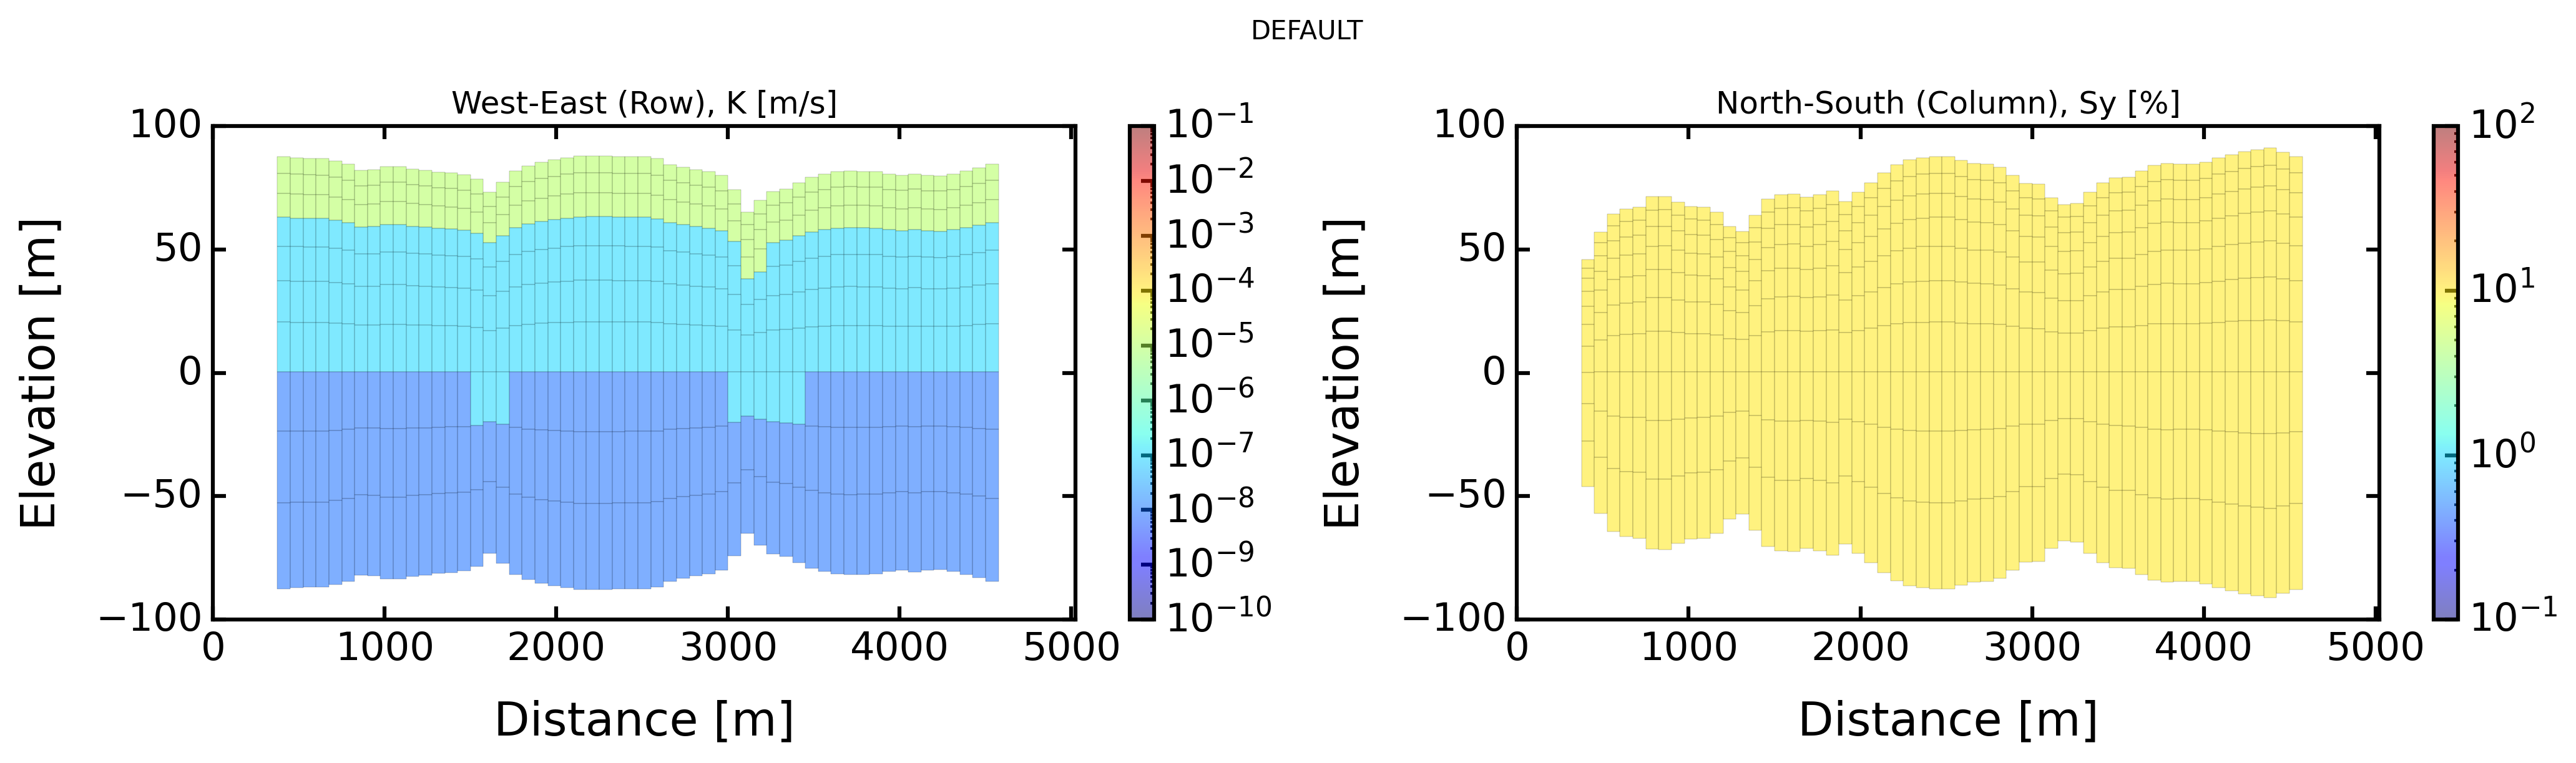

In [11]:

model_modflow = BV.preprocessing_modflow(for_calib=False)
success_modflow = BV.processing_modflow(model_modflow, write_model=True, run_model=True)
if success_modflow == True:
    BV.postprocessing_modflow(model_modflow,
                              watertable_elevation = True,
                              watertable_depth= True, 
                              seepage_areas = True,
                              outflow_drain = True,
                              groundwater_flux = True,
                              groundwater_storage = True,
                              accumulation_flux = True,
                              persistency_index=False,
                              intermittency_monthly=False,
                              intermittency_daily=False,
                              export_all_tif = False)



In [12]:

if sim_state == 'steady':
    if success_modflow == True:
        model_modpath = BV.preprocessing_modpath(model_modflow)
        success_modpath = BV.processing_modpath(model_modpath, write_model=True, run_model=True)
    if success_modpath == True:
        BV.postprocessing_modpath(model_modpath,
                                  ending_point=True,
                                  starting_point=True,
                                  pathlines_shp=True,
                                  particles_shp=True,
                                  random_id=100)



writing loc particle data
FloPy is using the following executable to run the model: ../../../../../bin/linux/mp6
Processing basic data ...
Checking head file ...
Checking budget file and building index ...
 
Run particle tracking simulation ...
Processing Time Step     1 Period     1.  Time =  1.00000E+00                                                                       
Particle tracking complete. Writing endpoint file ...                                                                               
End of MODPATH simulation. Normal termination.
(numpy.record, [('particleid', '<i4'), ('particlegroup', '<i4'), ('timepointindex', '<i4'), ('cumulativetimestep', '<i4'), ('time', '<f4'), ('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('k', '<i4'), ('i', '<i4'), ('j', '<i4'), ('grid', '<i4'), ('xloc', '<f4'), ('yloc', '<f4'), ('zloc', '<f4'), ('linesegmentindex', '<i4')])
(numpy.record, [('particleid', '<i4'), ('particlegroup', '<i4'), ('timepointindex', '<i4'), ('cumulativetimestep', '<i4'

In [13]:

if from_dem == None:
    subbasin_results = True
else:
    subbasin_results = False

if sim_state == 'steady':
    model_modpath = model_modpath
else:
    model_modpath = None

timeseries_results = BV.postprocessing_timeseries(model_modflow=model_modflow,
                                                  model_modpath=model_modpath,
                                                  subbasin_results=subbasin_results,
                                                  datetime_format=False) # or None

netcdf_results = BV.postprocessing_netcdf(model_modflow,
                                          datetime_format=False)



   Export results as timeseries
   Export results as netcdf


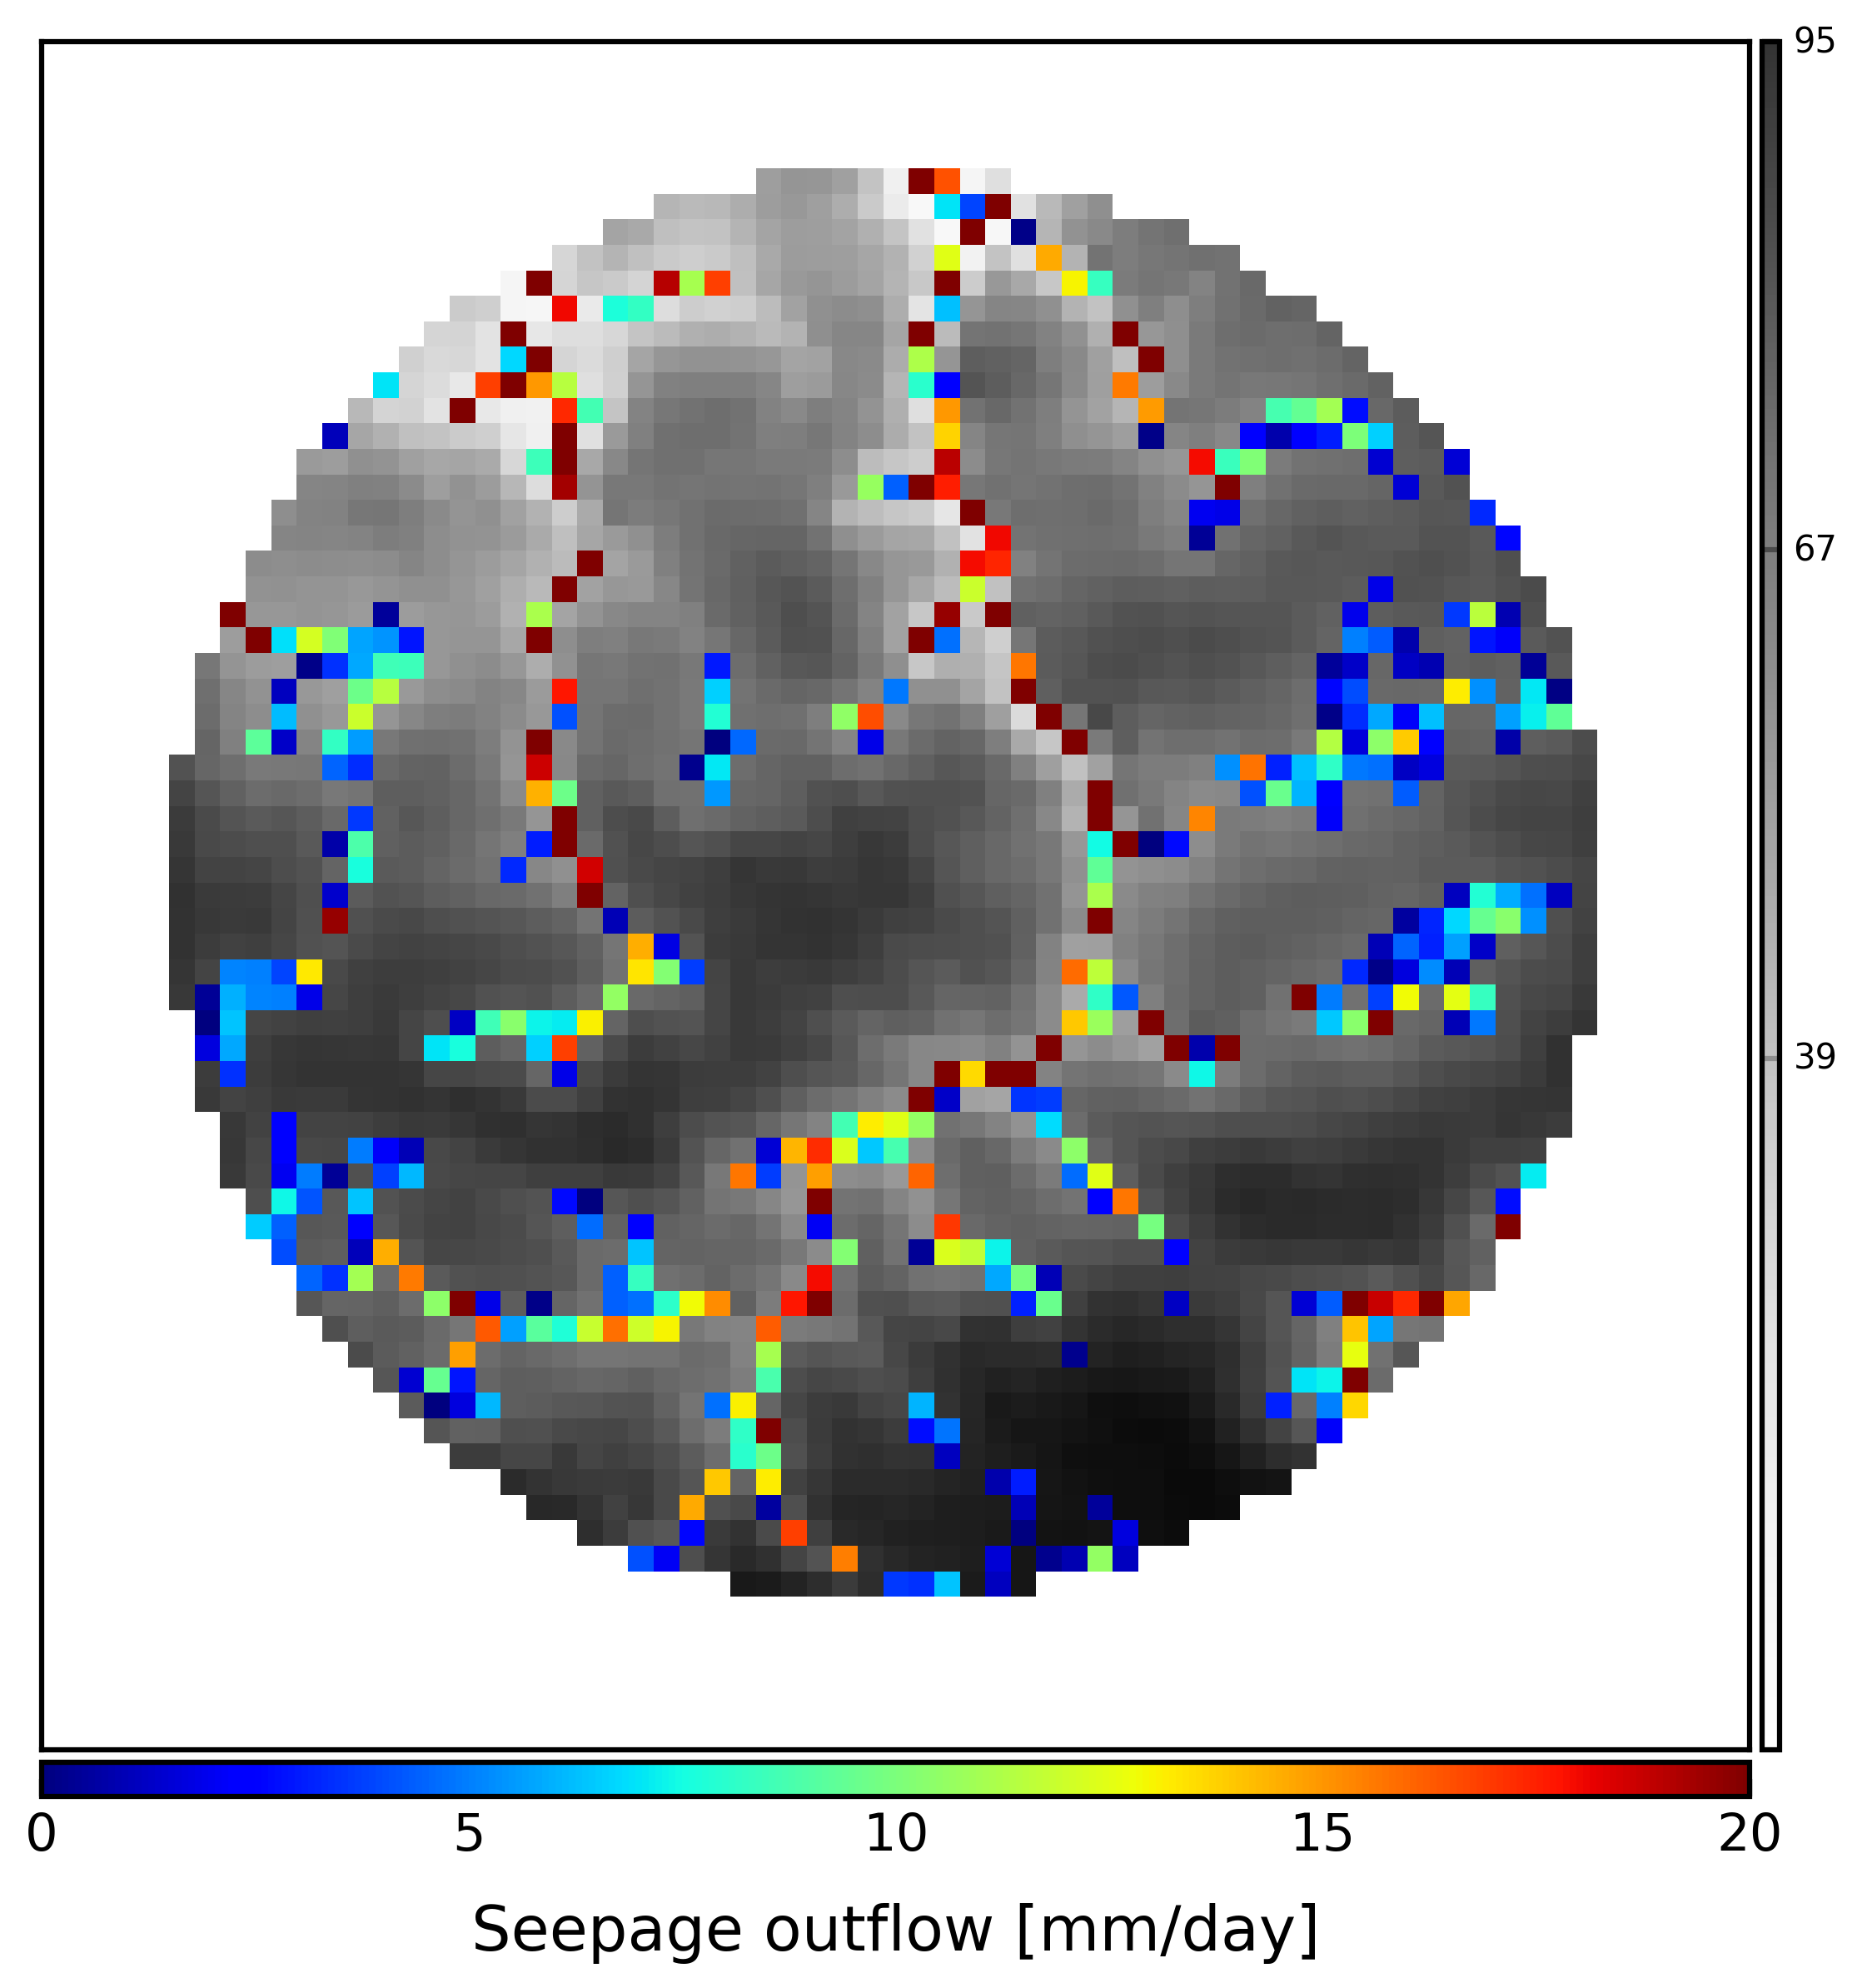

In [14]:

lead_numb = '0'
outflow = imageio.imread(os.path.join(simulations_folder,model_name,r'_postprocess/_rasters/outflow_drain_t(0).tif'))
accflow = imageio.imread(os.path.join(simulations_folder,model_name,r'_postprocess/_rasters/accumulation_flux_t(0).tif'))
demData = imageio.imread(BV.geographic.watershed_dem)
demData = np.ma.masked_array(demData, mask=demData<0)
res = BV.geographic.resolution

msk_outflow = (outflow<0)
outflow = np.ma.masked_array(outflow, mask=msk_outflow)
outflow = ( np.ma.masked_where(outflow==0, outflow) )
outflow = outflow  / (res**2)
outflow = outflow * 1000 # * 365 # mm/day or mm/year
# outflow = np.log10(outflow)

from matplotlib.colors import LightSource
ls = LightSource(azdeg=45, altdeg=45)
cmap = plt.cm.Greys
rgb = ls.shade(demData, cmap=cmap, blend_mode='soft', vert_exag=2, dx=res, dy=res)

fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi=300)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
im = ax.imshow(demData, alpha=0.8, cmap=cmap)
im = ax.imshow(rgb, alpha=0.8, cmap=cmap)
cf=ax.imshow(outflow, cmap='jet', alpha=1,
             # vmin=outflow.min(), vmax=1000
             )
try:
    cont = imageio.imread(BV.geographic.watershed_contour_tif)
    ax.imshow(np.ma.masked_where(cont<0, cont), cmap=mpl.colors.ListedColormap(['k']))
except:
    pass

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.05)
fig.add_axes(cax)
cbar = fig.colorbar(im, cax=cax, orientation="vertical")

val = np.ma.masked_where(demData < 0, demData)
minVal =  int(round(np.nanmin(val[np.nonzero(val)],0)))
maxVal =  int(round(np.nanmax(val[np.nonzero(val)],0)))
meanVal = int(round(minVal+((maxVal-minVal)/2),0))
cbar.set_ticks([minVal, meanVal, maxVal])
cbar.set_ticklabels([minVal, meanVal, maxVal])
cbar.mappable.set_clim(minVal, maxVal)
cbar.ax.tick_params(labelsize=10)

cax = divider.new_vertical(size="2%", pad=0.05, pack_start=True)
fig.add_axes(cax)
cbar = fig.colorbar(cf, cax=cax, orientation="horizontal")
ticks = np.linspace(0, 20, 5)
cbar.set_ticks(ticks)
# cbar.set_ticklabels(ticks.round(1))
cbar.mappable.set_clim(0, 20)
cbar.set_label('Seepage outflow [mm/day]')

plt.tight_layout()
name_fig = 'map_discharge_' + str(lead_numb) + '.png'
plt.tight_layout()

# fig.savefig(os.path.join(simulations_folder, model_name,
#                             '_postprocess', '_figures', 'RAW_'+model_name+'.png'))



  Plot 2D maps visualization


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

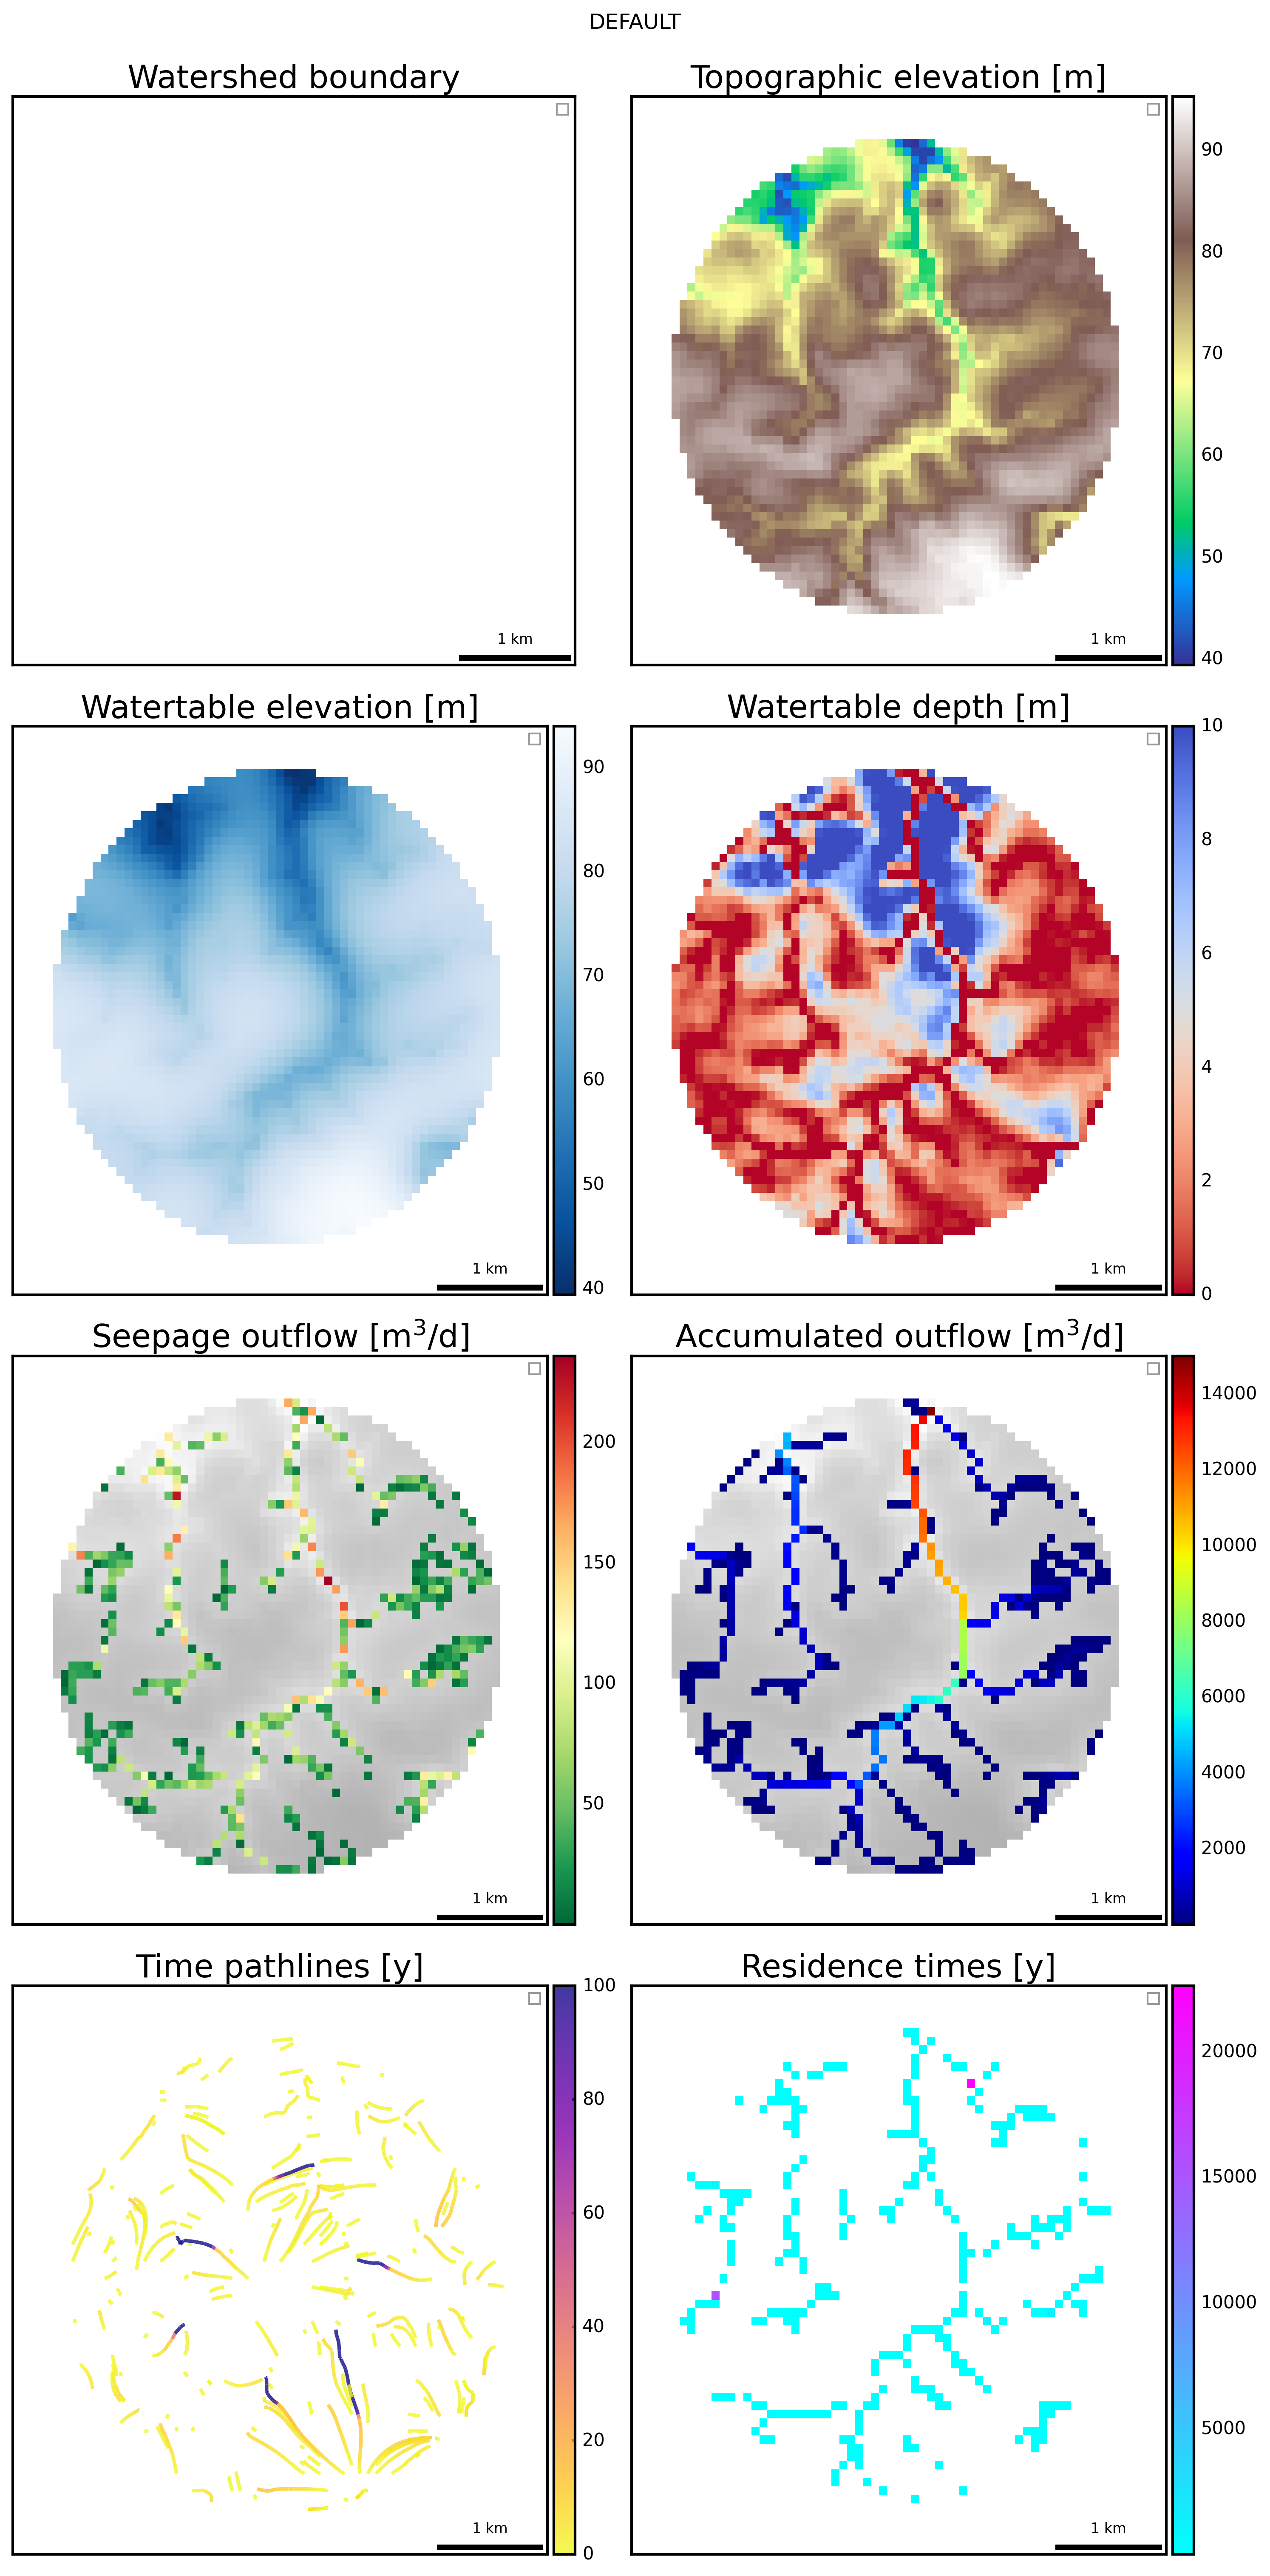

In [15]:

# if sim_state == 'steady':
visu = visualization_results.Visualization(BV, model_name)
visu.visual2D(object_list = ['map','grid',
                             'watertable', 'watertable_depth',
                             'drain_flow','surface_flow',
                             'pathlines', 'residence_times'
                             ],
              color_scale = [(None,None),(None,None),
                             (None,None),(0,10),
                             (None,None),(None,None),
                             (0,100),(None,None),
                             ], 
              lines=250)



In [16]:

if from_dem == None:
    export_vtuvtk.VTK(BV, model_name)
    visu = visualization_results.Visualization(BV, model_name)
    visu.visual3D(interactive=True, object_list=['grid','watertable', 'watertable_depth',
                                                  'surface_flow',
                                                  'drain_flow',
                                                  'pathlines'], view='south-west', lines=100, cloc=(0.7,0.1), z_scale=10)



In [17]:

dem_data = imageio.imread(os.path.join(stable_folder,'geographic','watershed_box_buff_dem.tif')) # dem data
if from_dem == None:
    stream_data = imageio.imread(os.path.join(stable_folder,'hydrography','regional stream network.tif')) # river data
else:
    stream_data = None
watertable_data = imageio.imread(os.path.join(simulations_folder,model_name,r'_postprocess/_rasters/','watertable_elevation_t(0).tif')) # watertable data
interactive = True
visu = visualization_results.Visualization(BV, model_name)
visu.interactive_cross_section(dem_data, watertable_data, stream_data, interactive)



  Plot 2D cross-section visualization


In [18]:

os.chdir(root_dir)
